## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [2]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    #To keep the input data we have taken a list
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    #We need training data to train our model so that later on it can test it with our test data
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    #With dataframes we can manipulate our data easily. Example: Selecting,replacing columns 
    #and indices and reshaping the data.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    #The data that we have is categorical data. As a result it is defined as variables with a finite set of label values, specifically 'Fizz', 'Buzz', 'FizzBuzz' and other.
    #The machine learning algorithm that we are using require numerical input and output variables. So we have to process the data and encode it in binary.
 
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # We will be dealing with numbers up to 1000 which is nearly equal to 2^10. So we need 10 bits to encode all of the data.
        #Hence we are encoding every number with 10 bits.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [5]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

C:\Users\riskh\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Model Definition

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 1000
second_dense_layer_nodes = 10
third_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # We need a model so that we can train our data in the way that we want.
    
    # Why use Dense layer and then activation?
    #We need activation functions to make the back-propagation possible since the gradients 
    #are supplied along with the error to update the weights and biases only after traversing through the dense layer
    #Without the differentiable non linear function, this would not be possible and our network would not be able to learn.
    
    # Why use sequential model with layers?
    #There is only one input layer and one output layer. So we are using a sequential model.
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    # Why dropout?
    
    # It reduces overfitting in neural networks by preventing complex co-adaptations on training data. We want 
    # to perform model averaging with neural networks.
    
   
    
    model.add(Dense(second_dense_layer_nodes))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    
   
    
    model.add(Activation('softmax'))
    
    # Why Softmax?
    
    #The softmax function has been used in the output layer of the classifier 
    #as we are actually trying to attain the probabilities to define the class of each input.
    
    model.summary()
    
    # Why use categorical_crossentropy?
    
    # This is because we are dealing with multi-class classification where each example belongs to a single class. If it was multilabel 
    #it would be multilabel classification.
    
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [92]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [93]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1000)              11000     
_________________________________________________________________
activation_24 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                10010     
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 44        
_________________________________________________________________
activation_25 (Activation)   (None, 4)                 0         
Total params: 21,054
Trainable params: 21,054
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [94]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128 #the number of items that would be in each batch
tb_batch_size = 32
early_patience = 100 # see if within 100 epochs there is any significant change in accuracy.

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min') #if there is no significant change in accuracy stop running


# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 293us/step - loss: 1.3772 - acc: 0.2514 - val_loss: 1.3534 - val_acc: 0.3056
Epoch 2/10000
720/720 [==============================] - 0s 26us/step - loss: 1.3352 - acc: 0.4167 - val_loss: 1.3113 - val_acc: 0.4833
Epoch 3/10000
720/720 [==============================] - 0s 36us/step - loss: 1.2986 - acc: 0.5250 - val_loss: 1.2769 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 47us/step - loss: 1.2772 - acc: 0.5250 - val_loss: 1.2494 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 27us/step - loss: 1.2490 - acc: 0.5306 - val_loss: 1.2268 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 38us/step - loss: 1.2291 - acc: 0.5333 - val_loss: 1.2082 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 39us/step - loss: 1.2185 - acc: 0.5333 - val_loss: 1.1941 - val_acc: 0.5333
E

Epoch 120/10000
720/720 [==============================] - 0s 76us/step - loss: 1.1412 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 121/10000
720/720 [==============================] - 0s 87us/step - loss: 1.1468 - acc: 0.5333 - val_loss: 1.1409 - val_acc: 0.5333
Epoch 122/10000
720/720 [==============================] - 0s 84us/step - loss: 1.1485 - acc: 0.5333 - val_loss: 1.1408 - val_acc: 0.5333
Epoch 123/10000
720/720 [==============================] - 0s 77us/step - loss: 1.1335 - acc: 0.5333 - val_loss: 1.1409 - val_acc: 0.5333
Epoch 124/10000
720/720 [==============================] - 0s 77us/step - loss: 1.1399 - acc: 0.5333 - val_loss: 1.1410 - val_acc: 0.5333
Epoch 125/10000
720/720 [==============================] - 0s 58us/step - loss: 1.1435 - acc: 0.5333 - val_loss: 1.1411 - val_acc: 0.5333
Epoch 126/10000
720/720 [==============================] - 0s 60us/step - loss: 1.1457 - acc: 0.5333 - val_loss: 1.1410 - val_acc: 0.5333
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 68us/step - loss: 1.1386 - acc: 0.5333 - val_loss: 1.1400 - val_acc: 0.5333
Epoch 239/10000
720/720 [==============================] - 0s 70us/step - loss: 1.1441 - acc: 0.5333 - val_loss: 1.1399 - val_acc: 0.5333
Epoch 240/10000
720/720 [==============================] - 0s 45us/step - loss: 1.1367 - acc: 0.5333 - val_loss: 1.1399 - val_acc: 0.5333
Epoch 241/10000
720/720 [==============================] - 0s 66us/step - loss: 1.1312 - acc: 0.5333 - val_loss: 1.1400 - val_acc: 0.5333
Epoch 242/10000
720/720 [==============================] - 0s 91us/step - loss: 1.1400 - acc: 0.5333 - val_loss: 1.1400 - val_acc: 0.5333
Epoch 243/10000
720/720 [==============================] - 0s 26us/step - loss: 1.1363 - acc: 0.5333 - val_loss: 1.1400 - val_acc: 0.5333
Epoch 244/10000
720/720 [==============================] - 0s 26us/step - loss: 1.1406 - acc: 0.5333 - val_loss: 1.1398 - val_acc: 0.5333
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 32us/step - loss: 1.1294 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 357/10000
720/720 [==============================] - 0s 30us/step - loss: 1.1320 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 358/10000
720/720 [==============================] - 0s 30us/step - loss: 1.1401 - acc: 0.5333 - val_loss: 1.1394 - val_acc: 0.5333
Epoch 359/10000
720/720 [==============================] - 0s 26us/step - loss: 1.1351 - acc: 0.5333 - val_loss: 1.1394 - val_acc: 0.5333
Epoch 360/10000
720/720 [==============================] - 0s 22us/step - loss: 1.1287 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 361/10000
720/720 [==============================] - 0s 30us/step - loss: 1.1337 - acc: 0.5333 - val_loss: 1.1394 - val_acc: 0.5333
Epoch 362/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1313 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 1.1247 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 475/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1272 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 476/10000
720/720 [==============================] - 0s 37us/step - loss: 1.1289 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 477/10000
720/720 [==============================] - 0s 38us/step - loss: 1.1247 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 478/10000
720/720 [==============================] - 0s 36us/step - loss: 1.1341 - acc: 0.5333 - val_loss: 1.1394 - val_acc: 0.5333
Epoch 479/10000
720/720 [==============================] - 0s 34us/step - loss: 1.1265 - acc: 0.5333 - val_loss: 1.1393 - val_acc: 0.5333
Epoch 480/10000
720/720 [==============================] - 0s 37us/step - loss: 1.1243 - acc: 0.5333 - val_loss: 1.1394 - val_acc: 0.5333
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 69us/step - loss: 1.1236 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 593/10000
720/720 [==============================] - 0s 75us/step - loss: 1.1258 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 594/10000
720/720 [==============================] - 0s 47us/step - loss: 1.1247 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 595/10000
720/720 [==============================] - 0s 73us/step - loss: 1.1263 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 596/10000
720/720 [==============================] - 0s 69us/step - loss: 1.1216 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 597/10000
720/720 [==============================] - 0s 65us/step - loss: 1.1243 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 598/10000
720/720 [==============================] - 0s 75us/step - loss: 1.1236 - acc: 0.5333 - val_loss: 1.1395 - val_acc: 0.5333
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 70us/step - loss: 1.1210 - acc: 0.5333 - val_loss: 1.1392 - val_acc: 0.5333
Epoch 711/10000
720/720 [==============================] - 0s 77us/step - loss: 1.1249 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 712/10000
720/720 [==============================] - 0s 37us/step - loss: 1.1192 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 713/10000
720/720 [==============================] - 0s 75us/step - loss: 1.1174 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 714/10000
720/720 [==============================] - 0s 77us/step - loss: 1.1198 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 715/10000
720/720 [==============================] - 0s 79us/step - loss: 1.1196 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 716/10000
720/720 [==============================] - 0s 72us/step - loss: 1.1204 - acc: 0.5333 - val_loss: 1.1392 - val_acc: 0.5333
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 42us/step - loss: 1.1106 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 829/10000
720/720 [==============================] - 0s 58us/step - loss: 1.1130 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 830/10000
720/720 [==============================] - 0s 71us/step - loss: 1.1144 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 831/10000
720/720 [==============================] - 0s 28us/step - loss: 1.1102 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 832/10000
720/720 [==============================] - 0s 28us/step - loss: 1.1136 - acc: 0.5333 - val_loss: 1.1390 - val_acc: 0.5333
Epoch 833/10000
720/720 [==============================] - 0s 28us/step - loss: 1.1145 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 834/10000
720/720 [==============================] - 0s 30us/step - loss: 1.1170 - acc: 0.5333 - val_loss: 1.1391 - val_acc: 0.5333
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 41us/step - loss: 1.1041 - acc: 0.5333 - val_loss: 1.1379 - val_acc: 0.5333
Epoch 947/10000
720/720 [==============================] - 0s 28us/step - loss: 1.1113 - acc: 0.5333 - val_loss: 1.1379 - val_acc: 0.5333
Epoch 948/10000
720/720 [==============================] - 0s 22us/step - loss: 1.1045 - acc: 0.5333 - val_loss: 1.1379 - val_acc: 0.5333
Epoch 949/10000
720/720 [==============================] - 0s 54us/step - loss: 1.1067 - acc: 0.5333 - val_loss: 1.1381 - val_acc: 0.5333
Epoch 950/10000
720/720 [==============================] - 0s 43us/step - loss: 1.1119 - acc: 0.5333 - val_loss: 1.1385 - val_acc: 0.5333
Epoch 951/10000
720/720 [==============================] - 0s 28us/step - loss: 1.1046 - acc: 0.5333 - val_loss: 1.1383 - val_acc: 0.5333
Epoch 952/10000
720/720 [==============================] - 0s 41us/step - loss: 1.1019 - acc: 0.5333 - val_loss: 1.1382 - val_acc: 0.5333
Epoch 953/10000
720/720 [=========================

Epoch 1064/10000
720/720 [==============================] - 0s 40us/step - loss: 1.0893 - acc: 0.5333 - val_loss: 1.1366 - val_acc: 0.5333
Epoch 1065/10000
720/720 [==============================] - 0s 42us/step - loss: 1.0944 - acc: 0.5333 - val_loss: 1.1367 - val_acc: 0.5333
Epoch 1066/10000
720/720 [==============================] - 0s 41us/step - loss: 1.0957 - acc: 0.5333 - val_loss: 1.1369 - val_acc: 0.5333
Epoch 1067/10000
720/720 [==============================] - 0s 35us/step - loss: 1.0872 - acc: 0.5333 - val_loss: 1.1365 - val_acc: 0.5333
Epoch 1068/10000
720/720 [==============================] - 0s 47us/step - loss: 1.0918 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 1069/10000
720/720 [==============================] - 0s 35us/step - loss: 1.0910 - acc: 0.5333 - val_loss: 1.1365 - val_acc: 0.5333
Epoch 1070/10000
720/720 [==============================] - 0s 36us/step - loss: 1.0911 - acc: 0.5333 - val_loss: 1.1363 - val_acc: 0.5333
Epoch 1071/10000
720/720 [=

Epoch 1123/10000
720/720 [==============================] - 0s 23us/step - loss: 1.0873 - acc: 0.5333 - val_loss: 1.1355 - val_acc: 0.5333
Epoch 1124/10000
720/720 [==============================] - 0s 24us/step - loss: 1.0858 - acc: 0.5333 - val_loss: 1.1354 - val_acc: 0.5333
Epoch 1125/10000
720/720 [==============================] - 0s 34us/step - loss: 1.0845 - acc: 0.5333 - val_loss: 1.1353 - val_acc: 0.5333
Epoch 1126/10000
720/720 [==============================] - 0s 20us/step - loss: 1.0903 - acc: 0.5333 - val_loss: 1.1350 - val_acc: 0.5333
Epoch 1127/10000
720/720 [==============================] - 0s 27us/step - loss: 1.0890 - acc: 0.5333 - val_loss: 1.1353 - val_acc: 0.5333
Epoch 1128/10000
720/720 [==============================] - 0s 31us/step - loss: 1.0892 - acc: 0.5333 - val_loss: 1.1352 - val_acc: 0.5333
Epoch 1129/10000
720/720 [==============================] - 0s 43us/step - loss: 1.0823 - acc: 0.5333 - val_loss: 1.1350 - val_acc: 0.5333
Epoch 1130/10000
720/720 [=

Epoch 1240/10000
720/720 [==============================] - 0s 26us/step - loss: 1.0730 - acc: 0.5347 - val_loss: 1.1314 - val_acc: 0.5333
Epoch 1241/10000
720/720 [==============================] - 0s 27us/step - loss: 1.0689 - acc: 0.5333 - val_loss: 1.1318 - val_acc: 0.5333
Epoch 1242/10000
720/720 [==============================] - 0s 26us/step - loss: 1.0672 - acc: 0.5333 - val_loss: 1.1321 - val_acc: 0.5333
Epoch 1243/10000
720/720 [==============================] - 0s 26us/step - loss: 1.0706 - acc: 0.5347 - val_loss: 1.1313 - val_acc: 0.5333
Epoch 1244/10000
720/720 [==============================] - 0s 26us/step - loss: 1.0653 - acc: 0.5333 - val_loss: 1.1311 - val_acc: 0.5333
Epoch 1245/10000
720/720 [==============================] - 0s 34us/step - loss: 1.0671 - acc: 0.5333 - val_loss: 1.1315 - val_acc: 0.5333
Epoch 1246/10000
720/720 [==============================] - 0s 35us/step - loss: 1.0659 - acc: 0.5319 - val_loss: 1.1311 - val_acc: 0.5333
Epoch 1247/10000
720/720 [=

Epoch 1299/10000
720/720 [==============================] - 0s 27us/step - loss: 1.0576 - acc: 0.5347 - val_loss: 1.1294 - val_acc: 0.5333
Epoch 1300/10000
720/720 [==============================] - 0s 23us/step - loss: 1.0547 - acc: 0.5347 - val_loss: 1.1290 - val_acc: 0.5333
Epoch 1301/10000
720/720 [==============================] - 0s 24us/step - loss: 1.0573 - acc: 0.5333 - val_loss: 1.1287 - val_acc: 0.5333
Epoch 1302/10000
720/720 [==============================] - 0s 46us/step - loss: 1.0627 - acc: 0.5333 - val_loss: 1.1284 - val_acc: 0.5333
Epoch 1303/10000
720/720 [==============================] - 0s 75us/step - loss: 1.0616 - acc: 0.5347 - val_loss: 1.1283 - val_acc: 0.5333
Epoch 1304/10000
720/720 [==============================] - 0s 70us/step - loss: 1.0593 - acc: 0.5361 - val_loss: 1.1288 - val_acc: 0.5333
Epoch 1305/10000
720/720 [==============================] - 0s 76us/step - loss: 1.0546 - acc: 0.5333 - val_loss: 1.1282 - val_acc: 0.5333
Epoch 1306/10000
720/720 [=

Epoch 1358/10000
720/720 [==============================] - 0s 69us/step - loss: 1.0435 - acc: 0.5375 - val_loss: 1.1249 - val_acc: 0.5333
Epoch 1359/10000
720/720 [==============================] - 0s 73us/step - loss: 1.0448 - acc: 0.5333 - val_loss: 1.1249 - val_acc: 0.5333
Epoch 1360/10000
720/720 [==============================] - 0s 87us/step - loss: 1.0456 - acc: 0.5333 - val_loss: 1.1247 - val_acc: 0.5333
Epoch 1361/10000
720/720 [==============================] - 0s 76us/step - loss: 1.0488 - acc: 0.5361 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 1362/10000
720/720 [==============================] - 0s 79us/step - loss: 1.0461 - acc: 0.5361 - val_loss: 1.1244 - val_acc: 0.5333
Epoch 1363/10000
720/720 [==============================] - 0s 47us/step - loss: 1.0505 - acc: 0.5347 - val_loss: 1.1257 - val_acc: 0.5333
Epoch 1364/10000
720/720 [==============================] - 0s 26us/step - loss: 1.0471 - acc: 0.5361 - val_loss: 1.1247 - val_acc: 0.5333
Epoch 1365/10000
720/720 [=

Epoch 1417/10000
720/720 [==============================] - 0s 46us/step - loss: 1.0366 - acc: 0.5389 - val_loss: 1.1196 - val_acc: 0.5333
Epoch 1418/10000
720/720 [==============================] - 0s 52us/step - loss: 1.0366 - acc: 0.5403 - val_loss: 1.1197 - val_acc: 0.5333
Epoch 1419/10000
720/720 [==============================] - 0s 43us/step - loss: 1.0358 - acc: 0.5375 - val_loss: 1.1190 - val_acc: 0.5333
Epoch 1420/10000
720/720 [==============================] - 0s 70us/step - loss: 1.0316 - acc: 0.5375 - val_loss: 1.1201 - val_acc: 0.5333
Epoch 1421/10000
720/720 [==============================] - 0s 72us/step - loss: 1.0363 - acc: 0.5375 - val_loss: 1.1201 - val_acc: 0.5333
Epoch 1422/10000
720/720 [==============================] - 0s 83us/step - loss: 1.0328 - acc: 0.5431 - val_loss: 1.1194 - val_acc: 0.5333
Epoch 1423/10000
720/720 [==============================] - 0s 38us/step - loss: 1.0325 - acc: 0.5389 - val_loss: 1.1190 - val_acc: 0.5333
Epoch 1424/10000
720/720 [=

Epoch 1476/10000
720/720 [==============================] - 0s 84us/step - loss: 1.0151 - acc: 0.5458 - val_loss: 1.1149 - val_acc: 0.5278
Epoch 1477/10000
720/720 [==============================] - 0s 49us/step - loss: 1.0195 - acc: 0.5444 - val_loss: 1.1135 - val_acc: 0.5278
Epoch 1478/10000
720/720 [==============================] - 0s 72us/step - loss: 1.0181 - acc: 0.5444 - val_loss: 1.1134 - val_acc: 0.5278
Epoch 1479/10000
720/720 [==============================] - 0s 45us/step - loss: 1.0167 - acc: 0.5514 - val_loss: 1.1131 - val_acc: 0.5278
Epoch 1480/10000
720/720 [==============================] - 0s 76us/step - loss: 1.0183 - acc: 0.5444 - val_loss: 1.1128 - val_acc: 0.5278
Epoch 1481/10000
720/720 [==============================] - 0s 68us/step - loss: 1.0183 - acc: 0.5486 - val_loss: 1.1126 - val_acc: 0.5278
Epoch 1482/10000
720/720 [==============================] - 0s 81us/step - loss: 1.0176 - acc: 0.5403 - val_loss: 1.1119 - val_acc: 0.5333
Epoch 1483/10000
720/720 [=

Epoch 1535/10000
720/720 [==============================] - 0s 27us/step - loss: 1.0028 - acc: 0.5514 - val_loss: 1.1047 - val_acc: 0.5278
Epoch 1536/10000
720/720 [==============================] - 0s 27us/step - loss: 1.0004 - acc: 0.5556 - val_loss: 1.1048 - val_acc: 0.5278
Epoch 1537/10000
720/720 [==============================] - 0s 32us/step - loss: 0.9971 - acc: 0.5514 - val_loss: 1.1039 - val_acc: 0.5278
Epoch 1538/10000
720/720 [==============================] - 0s 28us/step - loss: 1.0029 - acc: 0.5528 - val_loss: 1.1054 - val_acc: 0.5389
Epoch 1539/10000
720/720 [==============================] - 0s 31us/step - loss: 0.9959 - acc: 0.5514 - val_loss: 1.1052 - val_acc: 0.5389
Epoch 1540/10000
720/720 [==============================] - 0s 30us/step - loss: 1.0037 - acc: 0.5583 - val_loss: 1.1051 - val_acc: 0.5333
Epoch 1541/10000
720/720 [==============================] - 0s 35us/step - loss: 1.0036 - acc: 0.5583 - val_loss: 1.1042 - val_acc: 0.5333
Epoch 1542/10000
720/720 [=

Epoch 1594/10000
720/720 [==============================] - 0s 27us/step - loss: 0.9814 - acc: 0.5681 - val_loss: 1.0931 - val_acc: 0.5389
Epoch 1595/10000
720/720 [==============================] - 0s 64us/step - loss: 0.9790 - acc: 0.5569 - val_loss: 1.0954 - val_acc: 0.5278
Epoch 1596/10000
720/720 [==============================] - 0s 77us/step - loss: 0.9801 - acc: 0.5542 - val_loss: 1.0930 - val_acc: 0.5389
Epoch 1597/10000
720/720 [==============================] - 0s 52us/step - loss: 0.9909 - acc: 0.5486 - val_loss: 1.0950 - val_acc: 0.5278
Epoch 1598/10000
720/720 [==============================] - 0s 74us/step - loss: 0.9791 - acc: 0.5625 - val_loss: 1.0937 - val_acc: 0.5333
Epoch 1599/10000
720/720 [==============================] - 0s 77us/step - loss: 0.9793 - acc: 0.5611 - val_loss: 1.0926 - val_acc: 0.5389
Epoch 1600/10000
720/720 [==============================] - 0s 73us/step - loss: 0.9818 - acc: 0.5556 - val_loss: 1.0919 - val_acc: 0.5389
Epoch 1601/10000
720/720 [=

Epoch 1653/10000
720/720 [==============================] - 0s 70us/step - loss: 0.9597 - acc: 0.5625 - val_loss: 1.0789 - val_acc: 0.5389
Epoch 1654/10000
720/720 [==============================] - 0s 76us/step - loss: 0.9513 - acc: 0.5653 - val_loss: 1.0784 - val_acc: 0.5389
Epoch 1655/10000
720/720 [==============================] - 0s 80us/step - loss: 0.9529 - acc: 0.5722 - val_loss: 1.0794 - val_acc: 0.5389
Epoch 1656/10000
720/720 [==============================] - 0s 45us/step - loss: 0.9672 - acc: 0.5569 - val_loss: 1.0814 - val_acc: 0.5444
Epoch 1657/10000
720/720 [==============================] - 0s 66us/step - loss: 0.9524 - acc: 0.5694 - val_loss: 1.0770 - val_acc: 0.5389
Epoch 1658/10000
720/720 [==============================] - 0s 46us/step - loss: 0.9549 - acc: 0.5597 - val_loss: 1.0789 - val_acc: 0.5444
Epoch 1659/10000
720/720 [==============================] - 0s 52us/step - loss: 0.9546 - acc: 0.5708 - val_loss: 1.0778 - val_acc: 0.5389
Epoch 1660/10000
720/720 [=

Epoch 1712/10000
720/720 [==============================] - 0s 75us/step - loss: 0.9345 - acc: 0.5806 - val_loss: 1.0601 - val_acc: 0.5611
Epoch 1713/10000
720/720 [==============================] - 0s 76us/step - loss: 0.9240 - acc: 0.5833 - val_loss: 1.0597 - val_acc: 0.5611
Epoch 1714/10000
720/720 [==============================] - 0s 69us/step - loss: 0.9228 - acc: 0.5889 - val_loss: 1.0598 - val_acc: 0.5611
Epoch 1715/10000
720/720 [==============================] - 0s 60us/step - loss: 0.9345 - acc: 0.5819 - val_loss: 1.0598 - val_acc: 0.5611
Epoch 1716/10000
720/720 [==============================] - 0s 69us/step - loss: 0.9249 - acc: 0.5819 - val_loss: 1.0597 - val_acc: 0.5667
Epoch 1717/10000
720/720 [==============================] - 0s 73us/step - loss: 0.9322 - acc: 0.5833 - val_loss: 1.0577 - val_acc: 0.5556
Epoch 1718/10000
720/720 [==============================] - 0s 80us/step - loss: 0.9345 - acc: 0.5694 - val_loss: 1.0587 - val_acc: 0.5667
Epoch 1719/10000
720/720 [=

Epoch 1771/10000
720/720 [==============================] - 0s 72us/step - loss: 0.9035 - acc: 0.6125 - val_loss: 1.0393 - val_acc: 0.5722
Epoch 1772/10000
720/720 [==============================] - 0s 73us/step - loss: 0.9022 - acc: 0.5972 - val_loss: 1.0509 - val_acc: 0.6000
Epoch 1773/10000
720/720 [==============================] - 0s 79us/step - loss: 0.9036 - acc: 0.6222 - val_loss: 1.0420 - val_acc: 0.5944
Epoch 1774/10000
720/720 [==============================] - 0s 77us/step - loss: 0.9043 - acc: 0.5917 - val_loss: 1.0497 - val_acc: 0.6000
Epoch 1775/10000
720/720 [==============================] - 0s 73us/step - loss: 0.8987 - acc: 0.6083 - val_loss: 1.0447 - val_acc: 0.5944
Epoch 1776/10000
720/720 [==============================] - 0s 72us/step - loss: 0.8971 - acc: 0.6097 - val_loss: 1.0451 - val_acc: 0.6000
Epoch 1777/10000
720/720 [==============================] - 0s 75us/step - loss: 0.9020 - acc: 0.6042 - val_loss: 1.0486 - val_acc: 0.6000
Epoch 1778/10000
720/720 [=

Epoch 1830/10000
720/720 [==============================] - 0s 76us/step - loss: 0.8643 - acc: 0.6292 - val_loss: 1.0220 - val_acc: 0.6167
Epoch 1831/10000
720/720 [==============================] - 0s 83us/step - loss: 0.8718 - acc: 0.6417 - val_loss: 1.0139 - val_acc: 0.6167
Epoch 1832/10000
720/720 [==============================] - 0s 66us/step - loss: 0.8676 - acc: 0.6208 - val_loss: 1.0192 - val_acc: 0.6222
Epoch 1833/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8609 - acc: 0.6389 - val_loss: 1.0155 - val_acc: 0.6278
Epoch 1834/10000
720/720 [==============================] - 0s 72us/step - loss: 0.8595 - acc: 0.6319 - val_loss: 1.0164 - val_acc: 0.6222
Epoch 1835/10000
720/720 [==============================] - 0s 75us/step - loss: 0.8606 - acc: 0.6361 - val_loss: 1.0169 - val_acc: 0.6167
Epoch 1836/10000
720/720 [==============================] - 0s 62us/step - loss: 0.8645 - acc: 0.6403 - val_loss: 1.0161 - val_acc: 0.6222
Epoch 1837/10000
720/720 [=

Epoch 1889/10000
720/720 [==============================] - 0s 27us/step - loss: 0.8271 - acc: 0.6764 - val_loss: 0.9890 - val_acc: 0.6444
Epoch 1890/10000
720/720 [==============================] - 0s 23us/step - loss: 0.8291 - acc: 0.6556 - val_loss: 0.9922 - val_acc: 0.6389
Epoch 1891/10000
720/720 [==============================] - 0s 22us/step - loss: 0.8283 - acc: 0.6625 - val_loss: 0.9877 - val_acc: 0.6500
Epoch 1892/10000
720/720 [==============================] - 0s 83us/step - loss: 0.8288 - acc: 0.6639 - val_loss: 0.9849 - val_acc: 0.6333
Epoch 1893/10000
720/720 [==============================] - 0s 33us/step - loss: 0.8262 - acc: 0.6611 - val_loss: 0.9883 - val_acc: 0.6500
Epoch 1894/10000
720/720 [==============================] - 0s 24us/step - loss: 0.8238 - acc: 0.6750 - val_loss: 0.9904 - val_acc: 0.6389
Epoch 1895/10000
720/720 [==============================] - 0s 23us/step - loss: 0.8232 - acc: 0.6528 - val_loss: 0.9879 - val_acc: 0.6500
Epoch 1896/10000
720/720 [=

Epoch 1948/10000
720/720 [==============================] - 0s 66us/step - loss: 0.7974 - acc: 0.6764 - val_loss: 0.9497 - val_acc: 0.6333
Epoch 1949/10000
720/720 [==============================] - 0s 68us/step - loss: 0.7782 - acc: 0.6931 - val_loss: 0.9598 - val_acc: 0.6722
Epoch 1950/10000
720/720 [==============================] - 0s 50us/step - loss: 0.7923 - acc: 0.6958 - val_loss: 0.9562 - val_acc: 0.6722
Epoch 1951/10000
720/720 [==============================] - 0s 34us/step - loss: 0.7766 - acc: 0.7139 - val_loss: 0.9526 - val_acc: 0.6611
Epoch 1952/10000
720/720 [==============================] - 0s 34us/step - loss: 0.7883 - acc: 0.7000 - val_loss: 0.9495 - val_acc: 0.6389
Epoch 1953/10000
720/720 [==============================] - 0s 72us/step - loss: 0.7860 - acc: 0.6861 - val_loss: 0.9567 - val_acc: 0.6667
Epoch 1954/10000
720/720 [==============================] - 0s 43us/step - loss: 0.7804 - acc: 0.7042 - val_loss: 0.9510 - val_acc: 0.6611
Epoch 1955/10000
720/720 [=

Epoch 2007/10000
720/720 [==============================] - 0s 42us/step - loss: 0.7349 - acc: 0.7417 - val_loss: 0.9195 - val_acc: 0.6944
Epoch 2008/10000
720/720 [==============================] - 0s 70us/step - loss: 0.7350 - acc: 0.7444 - val_loss: 0.9134 - val_acc: 0.6889
Epoch 2009/10000
720/720 [==============================] - 0s 53us/step - loss: 0.7417 - acc: 0.7417 - val_loss: 0.9105 - val_acc: 0.6889
Epoch 2010/10000
720/720 [==============================] - 0s 72us/step - loss: 0.7346 - acc: 0.7319 - val_loss: 0.9121 - val_acc: 0.6889
Epoch 2011/10000
720/720 [==============================] - 0s 87us/step - loss: 0.7278 - acc: 0.7486 - val_loss: 0.9085 - val_acc: 0.6833
Epoch 2012/10000
720/720 [==============================] - 0s 75us/step - loss: 0.7348 - acc: 0.7431 - val_loss: 0.9076 - val_acc: 0.6778
Epoch 2013/10000
720/720 [==============================] - 0s 88us/step - loss: 0.7276 - acc: 0.7250 - val_loss: 0.9112 - val_acc: 0.6944
Epoch 2014/10000
720/720 [=

720/720 [==============================] - 0s 26us/step - loss: 0.6366 - acc: 0.7847 - val_loss: 0.8302 - val_acc: 0.7500
Epoch 2125/10000
720/720 [==============================] - 0s 24us/step - loss: 0.6277 - acc: 0.8069 - val_loss: 0.8247 - val_acc: 0.7333
Epoch 2126/10000
720/720 [==============================] - 0s 28us/step - loss: 0.6372 - acc: 0.7875 - val_loss: 0.8231 - val_acc: 0.7278
Epoch 2127/10000
720/720 [==============================] - 0s 24us/step - loss: 0.6386 - acc: 0.7931 - val_loss: 0.8210 - val_acc: 0.7222
Epoch 2128/10000
720/720 [==============================] - 0s 24us/step - loss: 0.6369 - acc: 0.7722 - val_loss: 0.8210 - val_acc: 0.7333
Epoch 2129/10000
720/720 [==============================] - 0s 31us/step - loss: 0.6454 - acc: 0.7847 - val_loss: 0.8227 - val_acc: 0.7444
Epoch 2130/10000
720/720 [==============================] - 0s 31us/step - loss: 0.6296 - acc: 0.8069 - val_loss: 0.8217 - val_acc: 0.7444
Epoch 2131/10000
720/720 [==================

720/720 [==============================] - 0s 26us/step - loss: 0.5781 - acc: 0.8153 - val_loss: 0.7770 - val_acc: 0.7389
Epoch 2184/10000
720/720 [==============================] - 0s 22us/step - loss: 0.5800 - acc: 0.8167 - val_loss: 0.7768 - val_acc: 0.7889
Epoch 2185/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5882 - acc: 0.8208 - val_loss: 0.7743 - val_acc: 0.7611
Epoch 2186/10000
720/720 [==============================] - 0s 30us/step - loss: 0.5804 - acc: 0.8375 - val_loss: 0.7718 - val_acc: 0.7500
Epoch 2187/10000
720/720 [==============================] - 0s 23us/step - loss: 0.5719 - acc: 0.8306 - val_loss: 0.7726 - val_acc: 0.7778
Epoch 2188/10000
720/720 [==============================] - 0s 23us/step - loss: 0.5799 - acc: 0.8319 - val_loss: 0.7694 - val_acc: 0.7667
Epoch 2189/10000
720/720 [==============================] - 0s 31us/step - loss: 0.5823 - acc: 0.8278 - val_loss: 0.7698 - val_acc: 0.7500
Epoch 2190/10000
720/720 [==================

720/720 [==============================] - 0s 32us/step - loss: 0.5304 - acc: 0.8556 - val_loss: 0.7287 - val_acc: 0.7778
Epoch 2243/10000
720/720 [==============================] - 0s 31us/step - loss: 0.5237 - acc: 0.8347 - val_loss: 0.7268 - val_acc: 0.7722
Epoch 2244/10000
720/720 [==============================] - 0s 27us/step - loss: 0.5216 - acc: 0.8583 - val_loss: 0.7247 - val_acc: 0.7889
Epoch 2245/10000
720/720 [==============================] - 0s 24us/step - loss: 0.5083 - acc: 0.8736 - val_loss: 0.7254 - val_acc: 0.7722
Epoch 2246/10000
720/720 [==============================] - 0s 22us/step - loss: 0.5344 - acc: 0.8319 - val_loss: 0.7257 - val_acc: 0.7778
Epoch 2247/10000
720/720 [==============================] - 0s 23us/step - loss: 0.5385 - acc: 0.8458 - val_loss: 0.7236 - val_acc: 0.7889
Epoch 2248/10000
720/720 [==============================] - 0s 24us/step - loss: 0.5075 - acc: 0.8667 - val_loss: 0.7242 - val_acc: 0.7778
Epoch 2249/10000
720/720 [==================

720/720 [==============================] - 0s 69us/step - loss: 0.4777 - acc: 0.8833 - val_loss: 0.6834 - val_acc: 0.7833
Epoch 2302/10000
720/720 [==============================] - 0s 66us/step - loss: 0.4780 - acc: 0.8681 - val_loss: 0.6804 - val_acc: 0.8056
Epoch 2303/10000
720/720 [==============================] - 0s 47us/step - loss: 0.4751 - acc: 0.8792 - val_loss: 0.6849 - val_acc: 0.8056
Epoch 2304/10000
720/720 [==============================] - 0s 80us/step - loss: 0.4738 - acc: 0.8875 - val_loss: 0.6800 - val_acc: 0.8111
Epoch 2305/10000
720/720 [==============================] - 0s 60us/step - loss: 0.4605 - acc: 0.8889 - val_loss: 0.6783 - val_acc: 0.8111
Epoch 2306/10000
720/720 [==============================] - 0s 56us/step - loss: 0.4614 - acc: 0.8903 - val_loss: 0.6791 - val_acc: 0.8111
Epoch 2307/10000
720/720 [==============================] - 0s 80us/step - loss: 0.4800 - acc: 0.8778 - val_loss: 0.6824 - val_acc: 0.7889
Epoch 2308/10000
720/720 [==================

720/720 [==============================] - 0s 24us/step - loss: 0.4218 - acc: 0.9014 - val_loss: 0.6498 - val_acc: 0.8167
Epoch 2361/10000
720/720 [==============================] - 0s 26us/step - loss: 0.4278 - acc: 0.9069 - val_loss: 0.6395 - val_acc: 0.8167
Epoch 2362/10000
720/720 [==============================] - 0s 31us/step - loss: 0.4274 - acc: 0.9000 - val_loss: 0.6373 - val_acc: 0.8167
Epoch 2363/10000
720/720 [==============================] - 0s 39us/step - loss: 0.4278 - acc: 0.8917 - val_loss: 0.6370 - val_acc: 0.8278
Epoch 2364/10000
720/720 [==============================] - 0s 37us/step - loss: 0.4229 - acc: 0.9028 - val_loss: 0.6435 - val_acc: 0.8056
Epoch 2365/10000
720/720 [==============================] - 0s 83us/step - loss: 0.4273 - acc: 0.9083 - val_loss: 0.6369 - val_acc: 0.8278
Epoch 2366/10000
720/720 [==============================] - 0s 30us/step - loss: 0.4231 - acc: 0.9111 - val_loss: 0.6396 - val_acc: 0.8111
Epoch 2367/10000
720/720 [==================

Epoch 2478/10000
720/720 [==============================] - 0s 72us/step - loss: 0.3615 - acc: 0.9306 - val_loss: 0.5663 - val_acc: 0.8444
Epoch 2479/10000
720/720 [==============================] - 0s 75us/step - loss: 0.3584 - acc: 0.9236 - val_loss: 0.5639 - val_acc: 0.8556
Epoch 2480/10000
720/720 [==============================] - 0s 70us/step - loss: 0.3388 - acc: 0.9403 - val_loss: 0.5605 - val_acc: 0.8556
Epoch 2481/10000
720/720 [==============================] - 0s 80us/step - loss: 0.3496 - acc: 0.9333 - val_loss: 0.5658 - val_acc: 0.8500
Epoch 2482/10000
720/720 [==============================] - 0s 73us/step - loss: 0.3436 - acc: 0.9375 - val_loss: 0.5728 - val_acc: 0.8556
Epoch 2483/10000
720/720 [==============================] - 0s 61us/step - loss: 0.3394 - acc: 0.9389 - val_loss: 0.5635 - val_acc: 0.8389
Epoch 2484/10000
720/720 [==============================] - 0s 66us/step - loss: 0.3522 - acc: 0.9333 - val_loss: 0.5659 - val_acc: 0.8278
Epoch 2485/10000
720/720 [=

Epoch 2537/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3126 - acc: 0.9514 - val_loss: 0.5330 - val_acc: 0.8500
Epoch 2538/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3095 - acc: 0.9431 - val_loss: 0.5326 - val_acc: 0.8389
Epoch 2539/10000
720/720 [==============================] - 0s 24us/step - loss: 0.3119 - acc: 0.9417 - val_loss: 0.5295 - val_acc: 0.8667
Epoch 2540/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3123 - acc: 0.9417 - val_loss: 0.5275 - val_acc: 0.8667
Epoch 2541/10000
720/720 [==============================] - 0s 24us/step - loss: 0.3111 - acc: 0.9431 - val_loss: 0.5523 - val_acc: 0.8167
Epoch 2542/10000
720/720 [==============================] - 0s 26us/step - loss: 0.3133 - acc: 0.9486 - val_loss: 0.5349 - val_acc: 0.8722
Epoch 2543/10000
720/720 [==============================] - 0s 27us/step - loss: 0.3082 - acc: 0.9444 - val_loss: 0.5273 - val_acc: 0.8667
Epoch 2544/10000
720/720 [=

Epoch 2654/10000
720/720 [==============================] - 0s 69us/step - loss: 0.2561 - acc: 0.9611 - val_loss: 0.4729 - val_acc: 0.8722
Epoch 2655/10000
720/720 [==============================] - 0s 75us/step - loss: 0.2625 - acc: 0.9556 - val_loss: 0.4776 - val_acc: 0.8611
Epoch 2656/10000
720/720 [==============================] - 0s 57us/step - loss: 0.2530 - acc: 0.9625 - val_loss: 0.4815 - val_acc: 0.8500
Epoch 2657/10000
720/720 [==============================] - 0s 58us/step - loss: 0.2597 - acc: 0.9569 - val_loss: 0.4809 - val_acc: 0.8500
Epoch 2658/10000
720/720 [==============================] - 0s 64us/step - loss: 0.2494 - acc: 0.9542 - val_loss: 0.4689 - val_acc: 0.8722
Epoch 2659/10000
720/720 [==============================] - 0s 70us/step - loss: 0.2551 - acc: 0.9653 - val_loss: 0.4702 - val_acc: 0.8778
Epoch 2660/10000
720/720 [==============================] - 0s 76us/step - loss: 0.2450 - acc: 0.9639 - val_loss: 0.4698 - val_acc: 0.8722
Epoch 2661/10000
720/720 [=

Epoch 2713/10000
720/720 [==============================] - 0s 22us/step - loss: 0.2271 - acc: 0.9597 - val_loss: 0.4463 - val_acc: 0.8778
Epoch 2714/10000
720/720 [==============================] - 0s 26us/step - loss: 0.2315 - acc: 0.9556 - val_loss: 0.4474 - val_acc: 0.8778
Epoch 2715/10000
720/720 [==============================] - 0s 23us/step - loss: 0.2238 - acc: 0.9611 - val_loss: 0.4463 - val_acc: 0.8833
Epoch 2716/10000
720/720 [==============================] - 0s 23us/step - loss: 0.2329 - acc: 0.9639 - val_loss: 0.4488 - val_acc: 0.8611
Epoch 2717/10000
720/720 [==============================] - 0s 24us/step - loss: 0.2218 - acc: 0.9708 - val_loss: 0.4453 - val_acc: 0.8833
Epoch 2718/10000
720/720 [==============================] - 0s 20us/step - loss: 0.2375 - acc: 0.9514 - val_loss: 0.4424 - val_acc: 0.8833
Epoch 2719/10000
720/720 [==============================] - 0s 35us/step - loss: 0.2384 - acc: 0.9542 - val_loss: 0.4421 - val_acc: 0.8833
Epoch 2720/10000
720/720 [=

Epoch 2772/10000
720/720 [==============================] - 0s 32us/step - loss: 0.2055 - acc: 0.9750 - val_loss: 0.4244 - val_acc: 0.8889
Epoch 2773/10000
720/720 [==============================] - 0s 31us/step - loss: 0.2141 - acc: 0.9708 - val_loss: 0.4217 - val_acc: 0.8833
Epoch 2774/10000
720/720 [==============================] - 0s 87us/step - loss: 0.2115 - acc: 0.9653 - val_loss: 0.4438 - val_acc: 0.8556
Epoch 2775/10000
720/720 [==============================] - 0s 26us/step - loss: 0.2039 - acc: 0.9694 - val_loss: 0.4245 - val_acc: 0.8889
Epoch 2776/10000
720/720 [==============================] - 0s 24us/step - loss: 0.2024 - acc: 0.9681 - val_loss: 0.4283 - val_acc: 0.8722
Epoch 2777/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1955 - acc: 0.9722 - val_loss: 0.4276 - val_acc: 0.8833
Epoch 2778/10000
720/720 [==============================] - 0s 30us/step - loss: 0.2205 - acc: 0.9639 - val_loss: 0.4244 - val_acc: 0.8722
Epoch 2779/10000
720/720 [=

Epoch 2831/10000
720/720 [==============================] - 0s 23us/step - loss: 0.1841 - acc: 0.9778 - val_loss: 0.4054 - val_acc: 0.8889
Epoch 2832/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1963 - acc: 0.9667 - val_loss: 0.4409 - val_acc: 0.8444
Epoch 2833/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1847 - acc: 0.9764 - val_loss: 0.3991 - val_acc: 0.8944
Epoch 2834/10000
720/720 [==============================] - 0s 30us/step - loss: 0.1750 - acc: 0.9792 - val_loss: 0.4036 - val_acc: 0.8889
Epoch 2835/10000
720/720 [==============================] - 0s 30us/step - loss: 0.1946 - acc: 0.9667 - val_loss: 0.4194 - val_acc: 0.8500
Epoch 2836/10000
720/720 [==============================] - 0s 34us/step - loss: 0.1849 - acc: 0.9764 - val_loss: 0.3993 - val_acc: 0.8889
Epoch 2837/10000
720/720 [==============================] - 0s 35us/step - loss: 0.2032 - acc: 0.9639 - val_loss: 0.4013 - val_acc: 0.8944
Epoch 2838/10000
720/720 [=

720/720 [==============================] - 0s 52us/step - loss: 0.1592 - acc: 0.9819 - val_loss: 0.3671 - val_acc: 0.8944
Epoch 2949/10000
720/720 [==============================] - 0s 46us/step - loss: 0.1584 - acc: 0.9736 - val_loss: 0.3688 - val_acc: 0.9056
Epoch 2950/10000
720/720 [==============================] - 0s 79us/step - loss: 0.1579 - acc: 0.9833 - val_loss: 0.3657 - val_acc: 0.9000
Epoch 2951/10000
720/720 [==============================] - 0s 46us/step - loss: 0.1592 - acc: 0.9736 - val_loss: 0.3794 - val_acc: 0.8833
Epoch 2952/10000
720/720 [==============================] - 0s 77us/step - loss: 0.1510 - acc: 0.9819 - val_loss: 0.3699 - val_acc: 0.8889
Epoch 2953/10000
720/720 [==============================] - 0s 49us/step - loss: 0.1547 - acc: 0.9833 - val_loss: 0.3872 - val_acc: 0.8778
Epoch 2954/10000
720/720 [==============================] - 0s 73us/step - loss: 0.1585 - acc: 0.9694 - val_loss: 0.3686 - val_acc: 0.8944
Epoch 2955/10000
720/720 [==================

720/720 [==============================] - 0s 32us/step - loss: 0.1551 - acc: 0.9722 - val_loss: 0.3489 - val_acc: 0.8944
Epoch 3008/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1559 - acc: 0.9750 - val_loss: 0.3495 - val_acc: 0.9111
Epoch 3009/10000
720/720 [==============================] - 0s 23us/step - loss: 0.1446 - acc: 0.9764 - val_loss: 0.3479 - val_acc: 0.9056
Epoch 3010/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1426 - acc: 0.9833 - val_loss: 0.3478 - val_acc: 0.9000
Epoch 3011/10000
720/720 [==============================] - 0s 32us/step - loss: 0.1481 - acc: 0.9750 - val_loss: 0.3489 - val_acc: 0.9000
Epoch 3012/10000
720/720 [==============================] - 0s 30us/step - loss: 0.1421 - acc: 0.9750 - val_loss: 0.3454 - val_acc: 0.9000
Epoch 3013/10000
720/720 [==============================] - 0s 34us/step - loss: 0.1382 - acc: 0.9833 - val_loss: 0.3618 - val_acc: 0.8944
Epoch 3014/10000
720/720 [==================

720/720 [==============================] - 0s 24us/step - loss: 0.1276 - acc: 0.9903 - val_loss: 0.3436 - val_acc: 0.9056
Epoch 3067/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1328 - acc: 0.9847 - val_loss: 0.3482 - val_acc: 0.8889
Epoch 3068/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1312 - acc: 0.9833 - val_loss: 0.3412 - val_acc: 0.9167
Epoch 3069/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1293 - acc: 0.9819 - val_loss: 0.3427 - val_acc: 0.9000
Epoch 3070/10000
720/720 [==============================] - 0s 24us/step - loss: 0.1316 - acc: 0.9819 - val_loss: 0.3408 - val_acc: 0.9000
Epoch 3071/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1322 - acc: 0.9819 - val_loss: 0.3372 - val_acc: 0.9167
Epoch 3072/10000
720/720 [==============================] - 0s 37us/step - loss: 0.1373 - acc: 0.9819 - val_loss: 0.3361 - val_acc: 0.9000
Epoch 3073/10000
720/720 [==================

720/720 [==============================] - 0s 28us/step - loss: 0.1209 - acc: 0.9806 - val_loss: 0.3205 - val_acc: 0.9167
Epoch 3126/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1239 - acc: 0.9833 - val_loss: 0.3175 - val_acc: 0.9167
Epoch 3127/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1228 - acc: 0.9861 - val_loss: 0.3190 - val_acc: 0.9111
Epoch 3128/10000
720/720 [==============================] - 0s 22us/step - loss: 0.1281 - acc: 0.9875 - val_loss: 0.3213 - val_acc: 0.9167
Epoch 3129/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1242 - acc: 0.9764 - val_loss: 0.3206 - val_acc: 0.9056
Epoch 3130/10000
720/720 [==============================] - 0s 53us/step - loss: 0.1281 - acc: 0.9875 - val_loss: 0.3293 - val_acc: 0.9056
Epoch 3131/10000
720/720 [==============================] - 0s 46us/step - loss: 0.1198 - acc: 0.9833 - val_loss: 0.3227 - val_acc: 0.9056
Epoch 3132/10000
720/720 [==================

720/720 [==============================] - 0s 72us/step - loss: 0.1182 - acc: 0.9833 - val_loss: 0.3116 - val_acc: 0.9222
Epoch 3185/10000
720/720 [==============================] - 0s 57us/step - loss: 0.1122 - acc: 0.9903 - val_loss: 0.3176 - val_acc: 0.9222
Epoch 3186/10000
720/720 [==============================] - 0s 73us/step - loss: 0.1141 - acc: 0.9903 - val_loss: 0.3120 - val_acc: 0.9167
Epoch 3187/10000
720/720 [==============================] - 0s 52us/step - loss: 0.1086 - acc: 0.9889 - val_loss: 0.3142 - val_acc: 0.9222
Epoch 3188/10000
720/720 [==============================] - 0s 75us/step - loss: 0.1139 - acc: 0.9792 - val_loss: 0.3100 - val_acc: 0.9167
Epoch 3189/10000
720/720 [==============================] - 0s 72us/step - loss: 0.1163 - acc: 0.9889 - val_loss: 0.3098 - val_acc: 0.9167
Epoch 3190/10000
720/720 [==============================] - 0s 69us/step - loss: 0.1253 - acc: 0.9847 - val_loss: 0.3060 - val_acc: 0.9167
Epoch 3191/10000
720/720 [==================

720/720 [==============================] - 0s 52us/step - loss: 0.1133 - acc: 0.9792 - val_loss: 0.3094 - val_acc: 0.9167
Epoch 3244/10000
720/720 [==============================] - 0s 46us/step - loss: 0.1064 - acc: 0.9917 - val_loss: 0.3082 - val_acc: 0.9167
Epoch 3245/10000
720/720 [==============================] - 0s 75us/step - loss: 0.1069 - acc: 0.9833 - val_loss: 0.3045 - val_acc: 0.9111
Epoch 3246/10000
720/720 [==============================] - 0s 76us/step - loss: 0.1019 - acc: 0.9917 - val_loss: 0.2989 - val_acc: 0.9167
Epoch 3247/10000
720/720 [==============================] - 0s 60us/step - loss: 0.1108 - acc: 0.9833 - val_loss: 0.2977 - val_acc: 0.9222
Epoch 3248/10000
720/720 [==============================] - 0s 66us/step - loss: 0.1004 - acc: 0.9958 - val_loss: 0.3017 - val_acc: 0.9111
Epoch 3249/10000
720/720 [==============================] - 0s 79us/step - loss: 0.1101 - acc: 0.9847 - val_loss: 0.2957 - val_acc: 0.9222
Epoch 3250/10000
720/720 [==================

720/720 [==============================] - 0s 81us/step - loss: 0.1030 - acc: 0.9986 - val_loss: 0.3004 - val_acc: 0.9111
Epoch 3303/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1028 - acc: 0.9847 - val_loss: 0.2892 - val_acc: 0.9278
Epoch 3304/10000
720/720 [==============================] - 0s 84us/step - loss: 0.0967 - acc: 0.9833 - val_loss: 0.3089 - val_acc: 0.9056
Epoch 3305/10000
720/720 [==============================] - 0s 61us/step - loss: 0.1052 - acc: 0.9847 - val_loss: 0.2858 - val_acc: 0.9222
Epoch 3306/10000
720/720 [==============================] - 0s 28us/step - loss: 0.1006 - acc: 0.9875 - val_loss: 0.2863 - val_acc: 0.9167
Epoch 3307/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0991 - acc: 0.9917 - val_loss: 0.2874 - val_acc: 0.9222
Epoch 3308/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0968 - acc: 0.9889 - val_loss: 0.2885 - val_acc: 0.9222
Epoch 3309/10000
720/720 [==================

720/720 [==============================] - 0s 85us/step - loss: 0.0920 - acc: 0.9875 - val_loss: 0.2753 - val_acc: 0.9333
Epoch 3362/10000
720/720 [==============================] - 0s 56us/step - loss: 0.1009 - acc: 0.9903 - val_loss: 0.2775 - val_acc: 0.9278
Epoch 3363/10000
720/720 [==============================] - 0s 87us/step - loss: 0.0928 - acc: 0.9931 - val_loss: 0.2887 - val_acc: 0.9222
Epoch 3364/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0847 - acc: 0.9903 - val_loss: 0.2848 - val_acc: 0.9222
Epoch 3365/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0928 - acc: 0.9944 - val_loss: 0.2812 - val_acc: 0.9278
Epoch 3366/10000
720/720 [==============================] - 0s 91us/step - loss: 0.0997 - acc: 0.9861 - val_loss: 0.2728 - val_acc: 0.9333
Epoch 3367/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0903 - acc: 0.9944 - val_loss: 0.2883 - val_acc: 0.9167
Epoch 3368/10000
720/720 [==================

720/720 [==============================] - 0s 73us/step - loss: 0.0857 - acc: 0.9889 - val_loss: 0.2768 - val_acc: 0.9278
Epoch 3421/10000
720/720 [==============================] - 0s 74us/step - loss: 0.0914 - acc: 0.9847 - val_loss: 0.2724 - val_acc: 0.9278
Epoch 3422/10000
720/720 [==============================] - 0s 81us/step - loss: 0.0883 - acc: 0.9917 - val_loss: 0.2750 - val_acc: 0.9278
Epoch 3423/10000
720/720 [==============================] - 0s 76us/step - loss: 0.0834 - acc: 0.9931 - val_loss: 0.2673 - val_acc: 0.9278
Epoch 3424/10000
720/720 [==============================] - 0s 71us/step - loss: 0.0886 - acc: 0.9944 - val_loss: 0.2622 - val_acc: 0.9333
Epoch 3425/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0845 - acc: 0.9903 - val_loss: 0.2656 - val_acc: 0.9333
Epoch 3426/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0908 - acc: 0.9917 - val_loss: 0.2691 - val_acc: 0.9278
Epoch 3427/10000
720/720 [==================

720/720 [==============================] - 0s 60us/step - loss: 0.0865 - acc: 0.9958 - val_loss: 0.2692 - val_acc: 0.9278
Epoch 3480/10000
720/720 [==============================] - 0s 60us/step - loss: 0.0837 - acc: 0.9917 - val_loss: 0.2588 - val_acc: 0.9333
Epoch 3481/10000
720/720 [==============================] - 0s 80us/step - loss: 0.0804 - acc: 0.9944 - val_loss: 0.2660 - val_acc: 0.9278
Epoch 3482/10000
720/720 [==============================] - 0s 76us/step - loss: 0.0732 - acc: 0.9931 - val_loss: 0.2629 - val_acc: 0.9278
Epoch 3483/10000
720/720 [==============================] - 0s 65us/step - loss: 0.0816 - acc: 0.9903 - val_loss: 0.2628 - val_acc: 0.9333
Epoch 3484/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0802 - acc: 0.9917 - val_loss: 0.2648 - val_acc: 0.9278
Epoch 3485/10000
720/720 [==============================] - 0s 77us/step - loss: 0.0805 - acc: 0.9931 - val_loss: 0.2652 - val_acc: 0.9278
Epoch 3486/10000
720/720 [==================

720/720 [==============================] - 0s 68us/step - loss: 0.0766 - acc: 0.9917 - val_loss: 0.2485 - val_acc: 0.9278
Epoch 3597/10000
720/720 [==============================] - 0s 64us/step - loss: 0.0660 - acc: 0.9931 - val_loss: 0.2480 - val_acc: 0.9278
Epoch 3598/10000
720/720 [==============================] - 0s 70us/step - loss: 0.0850 - acc: 0.9875 - val_loss: 0.2518 - val_acc: 0.9278
Epoch 3599/10000
720/720 [==============================] - 0s 61us/step - loss: 0.0675 - acc: 0.9972 - val_loss: 0.2451 - val_acc: 0.9333
Epoch 3600/10000
720/720 [==============================] - 0s 84us/step - loss: 0.0663 - acc: 1.0000 - val_loss: 0.2560 - val_acc: 0.9278
Epoch 3601/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0684 - acc: 0.9944 - val_loss: 0.2589 - val_acc: 0.9222
Epoch 3602/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0743 - acc: 0.9958 - val_loss: 0.2454 - val_acc: 0.9333
Epoch 3603/10000
720/720 [==================

Epoch 3655/10000
720/720 [==============================] - 0s 64us/step - loss: 0.0735 - acc: 0.9931 - val_loss: 0.2449 - val_acc: 0.9278
Epoch 3656/10000
720/720 [==============================] - 0s 73us/step - loss: 0.0730 - acc: 0.9917 - val_loss: 0.2482 - val_acc: 0.9278
Epoch 3657/10000
720/720 [==============================] - 0s 49us/step - loss: 0.0637 - acc: 0.9944 - val_loss: 0.2467 - val_acc: 0.9278
Epoch 3658/10000
720/720 [==============================] - 0s 80us/step - loss: 0.0720 - acc: 0.9889 - val_loss: 0.2329 - val_acc: 0.9333
Epoch 3659/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0650 - acc: 0.9972 - val_loss: 0.2363 - val_acc: 0.9333
Epoch 3660/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0697 - acc: 0.9944 - val_loss: 0.2453 - val_acc: 0.9278
Epoch 3661/10000
720/720 [==============================] - 0s 53us/step - loss: 0.0717 - acc: 0.9903 - val_loss: 0.2364 - val_acc: 0.9333
Epoch 3662/10000
720/720 [=

Epoch 3714/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0649 - acc: 0.9972 - val_loss: 0.2338 - val_acc: 0.9333
Epoch 3715/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0651 - acc: 0.9931 - val_loss: 0.2392 - val_acc: 0.9333
Epoch 3716/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0645 - acc: 0.9958 - val_loss: 0.2320 - val_acc: 0.9333
Epoch 3717/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0693 - acc: 0.9944 - val_loss: 0.2345 - val_acc: 0.9333
Epoch 3718/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0665 - acc: 0.9986 - val_loss: 0.2337 - val_acc: 0.9333
Epoch 3719/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0641 - acc: 0.9958 - val_loss: 0.2295 - val_acc: 0.9333
Epoch 3720/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0645 - acc: 0.9958 - val_loss: 0.2364 - val_acc: 0.9333
Epoch 3721/10000
720/720 [=

Epoch 3773/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0689 - acc: 0.9944 - val_loss: 0.2274 - val_acc: 0.9333
Epoch 3774/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0561 - acc: 1.0000 - val_loss: 0.2281 - val_acc: 0.9389
Epoch 3775/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0624 - acc: 0.9972 - val_loss: 0.2283 - val_acc: 0.9389
Epoch 3776/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0571 - acc: 0.9944 - val_loss: 0.2230 - val_acc: 0.9389
Epoch 3777/10000
720/720 [==============================] - 0s 47us/step - loss: 0.0637 - acc: 0.9944 - val_loss: 0.2315 - val_acc: 0.9333
Epoch 3778/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0637 - acc: 1.0000 - val_loss: 0.2346 - val_acc: 0.9333
Epoch 3779/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0554 - acc: 0.9972 - val_loss: 0.2323 - val_acc: 0.9333
Epoch 3780/10000
720/720 [=

Epoch 3832/10000
720/720 [==============================] - 0s 70us/step - loss: 0.0629 - acc: 0.9958 - val_loss: 0.2294 - val_acc: 0.9278
Epoch 3833/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0524 - acc: 0.9972 - val_loss: 0.2211 - val_acc: 0.9333
Epoch 3834/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0633 - acc: 0.9958 - val_loss: 0.2241 - val_acc: 0.9333
Epoch 3835/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0575 - acc: 0.9972 - val_loss: 0.2212 - val_acc: 0.9389
Epoch 3836/10000
720/720 [==============================] - 0s 69us/step - loss: 0.0637 - acc: 0.9958 - val_loss: 0.2204 - val_acc: 0.9333
Epoch 3837/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0610 - acc: 0.9944 - val_loss: 0.2174 - val_acc: 0.9333
Epoch 3838/10000
720/720 [==============================] - 0s 88us/step - loss: 0.0642 - acc: 0.9931 - val_loss: 0.2204 - val_acc: 0.9333
Epoch 3839/10000
720/720 [=

720/720 [==============================] - 0s 24us/step - loss: 0.0514 - acc: 0.9958 - val_loss: 0.2151 - val_acc: 0.9333
Epoch 3950/10000
720/720 [==============================] - 0s 91us/step - loss: 0.0577 - acc: 0.9958 - val_loss: 0.2088 - val_acc: 0.9389
Epoch 3951/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0541 - acc: 0.9944 - val_loss: 0.2087 - val_acc: 0.9389
Epoch 3952/10000
720/720 [==============================] - 0s 77us/step - loss: 0.0462 - acc: 0.9972 - val_loss: 0.2093 - val_acc: 0.9389
Epoch 3953/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0622 - acc: 0.9903 - val_loss: 0.2141 - val_acc: 0.9389
Epoch 3954/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0532 - acc: 0.9986 - val_loss: 0.2172 - val_acc: 0.9389
Epoch 3955/10000
720/720 [==============================] - 0s 66us/step - loss: 0.0510 - acc: 0.9958 - val_loss: 0.2128 - val_acc: 0.9389
Epoch 3956/10000
720/720 [==================

Epoch 4067/10000
720/720 [==============================] - 0s 80us/step - loss: 0.0560 - acc: 0.9917 - val_loss: 0.2036 - val_acc: 0.9389
Epoch 4068/10000
720/720 [==============================] - 0s 76us/step - loss: 0.0517 - acc: 0.9986 - val_loss: 0.2053 - val_acc: 0.9389
Epoch 4069/10000
720/720 [==============================] - 0s 66us/step - loss: 0.0497 - acc: 0.9958 - val_loss: 0.2041 - val_acc: 0.9500
Epoch 4070/10000
720/720 [==============================] - 0s 69us/step - loss: 0.0561 - acc: 0.9875 - val_loss: 0.2071 - val_acc: 0.9389
Epoch 4071/10000
720/720 [==============================] - 0s 64us/step - loss: 0.0407 - acc: 1.0000 - val_loss: 0.2122 - val_acc: 0.9389
Epoch 4072/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0525 - acc: 0.9944 - val_loss: 0.2095 - val_acc: 0.9389
Epoch 4073/10000
720/720 [==============================] - 0s 77us/step - loss: 0.0458 - acc: 0.9944 - val_loss: 0.2087 - val_acc: 0.9389
Epoch 4074/10000
720/720 [=

Epoch 4126/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0431 - acc: 0.9986 - val_loss: 0.2032 - val_acc: 0.9389
Epoch 4127/10000
720/720 [==============================] - 0s 81us/step - loss: 0.0556 - acc: 0.9944 - val_loss: 0.2019 - val_acc: 0.9389
Epoch 4128/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0475 - acc: 0.9944 - val_loss: 0.2042 - val_acc: 0.9389
Epoch 4129/10000
720/720 [==============================] - 0s 69us/step - loss: 0.0460 - acc: 0.9958 - val_loss: 0.1956 - val_acc: 0.9389
Epoch 4130/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0457 - acc: 0.9986 - val_loss: 0.1971 - val_acc: 0.9444
Epoch 4131/10000
720/720 [==============================] - 0s 76us/step - loss: 0.0478 - acc: 0.9958 - val_loss: 0.1975 - val_acc: 0.9444
Epoch 4132/10000
720/720 [==============================] - 0s 81us/step - loss: 0.0452 - acc: 0.9917 - val_loss: 0.1994 - val_acc: 0.9444
Epoch 4133/10000
720/720 [=

Epoch 4185/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0482 - acc: 0.9944 - val_loss: 0.1992 - val_acc: 0.9389
Epoch 4186/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0502 - acc: 0.9958 - val_loss: 0.1907 - val_acc: 0.9500
Epoch 4187/10000
720/720 [==============================] - 0s 47us/step - loss: 0.0498 - acc: 0.9944 - val_loss: 0.1947 - val_acc: 0.9389
Epoch 4188/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0443 - acc: 0.9944 - val_loss: 0.2019 - val_acc: 0.9389
Epoch 4189/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0430 - acc: 0.9986 - val_loss: 0.2024 - val_acc: 0.9389
Epoch 4190/10000
720/720 [==============================] - 0s 22us/step - loss: 0.0463 - acc: 0.9986 - val_loss: 0.1997 - val_acc: 0.9500
Epoch 4191/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0412 - acc: 0.9972 - val_loss: 0.1991 - val_acc: 0.9444
Epoch 4192/10000
720/720 [=

Epoch 4244/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0400 - acc: 0.9944 - val_loss: 0.1988 - val_acc: 0.9389
Epoch 4245/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0481 - acc: 0.9986 - val_loss: 0.1928 - val_acc: 0.9389
Epoch 4246/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0466 - acc: 0.9931 - val_loss: 0.1932 - val_acc: 0.9389
Epoch 4247/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0438 - acc: 0.9972 - val_loss: 0.1940 - val_acc: 0.9444
Epoch 4248/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0467 - acc: 0.9944 - val_loss: 0.1927 - val_acc: 0.9389
Epoch 4249/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0438 - acc: 0.9972 - val_loss: 0.2000 - val_acc: 0.9444
Epoch 4250/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0429 - acc: 1.0000 - val_loss: 0.1933 - val_acc: 0.9389
Epoch 4251/10000
720/720 [=

Epoch 4303/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0369 - acc: 0.9986 - val_loss: 0.1965 - val_acc: 0.9389
Epoch 4304/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0437 - acc: 0.9986 - val_loss: 0.1917 - val_acc: 0.9444
Epoch 4305/10000
720/720 [==============================] - 0s 37us/step - loss: 0.0418 - acc: 0.9958 - val_loss: 0.1927 - val_acc: 0.9389
Epoch 4306/10000
720/720 [==============================] - 0s 30us/step - loss: 0.0373 - acc: 0.9986 - val_loss: 0.1987 - val_acc: 0.9389
Epoch 4307/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0392 - acc: 0.9972 - val_loss: 0.1943 - val_acc: 0.9389
Epoch 4308/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0412 - acc: 0.9958 - val_loss: 0.1950 - val_acc: 0.9389
Epoch 4309/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0397 - acc: 0.9972 - val_loss: 0.1972 - val_acc: 0.9389
Epoch 4310/10000
720/720 [=

Epoch 4362/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0428 - acc: 0.9931 - val_loss: 0.1836 - val_acc: 0.9500
Epoch 4363/10000
720/720 [==============================] - 0s 98us/step - loss: 0.0386 - acc: 0.9986 - val_loss: 0.1891 - val_acc: 0.9444
Epoch 4364/10000
720/720 [==============================] - 0s 70us/step - loss: 0.0459 - acc: 0.9944 - val_loss: 0.1845 - val_acc: 0.9444
Epoch 4365/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0468 - acc: 0.9972 - val_loss: 0.1925 - val_acc: 0.9389
Epoch 4366/10000
720/720 [==============================] - 0s 66us/step - loss: 0.0409 - acc: 0.9931 - val_loss: 0.1875 - val_acc: 0.9444
Epoch 4367/10000
720/720 [==============================] - 0s 68us/step - loss: 0.0307 - acc: 1.0000 - val_loss: 0.1835 - val_acc: 0.9444
Epoch 4368/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0445 - acc: 0.9958 - val_loss: 0.1835 - val_acc: 0.9444
Epoch 4369/10000
720/720 [=

Epoch 4421/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0360 - acc: 0.9986 - val_loss: 0.1837 - val_acc: 0.9500
Epoch 4422/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0374 - acc: 0.9986 - val_loss: 0.1812 - val_acc: 0.9500
Epoch 4423/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0390 - acc: 0.9972 - val_loss: 0.1902 - val_acc: 0.9444
Epoch 4424/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0470 - acc: 0.9958 - val_loss: 0.1835 - val_acc: 0.9500
Epoch 4425/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0372 - acc: 0.9972 - val_loss: 0.1838 - val_acc: 0.9444
Epoch 4426/10000
720/720 [==============================] - 0s 27us/step - loss: 0.0376 - acc: 0.9986 - val_loss: 0.1818 - val_acc: 0.9500
Epoch 4427/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0412 - acc: 0.9958 - val_loss: 0.1915 - val_acc: 0.9444
Epoch 4428/10000
720/720 [=

Epoch 4480/10000
720/720 [==============================] - 0s 28us/step - loss: 0.0360 - acc: 0.9972 - val_loss: 0.1743 - val_acc: 0.9556
Epoch 4481/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0409 - acc: 0.9917 - val_loss: 0.1761 - val_acc: 0.9444
Epoch 4482/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0414 - acc: 0.9958 - val_loss: 0.1764 - val_acc: 0.9500
Epoch 4483/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0380 - acc: 0.9972 - val_loss: 0.1783 - val_acc: 0.9444
Epoch 4484/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0434 - acc: 0.9944 - val_loss: 0.1820 - val_acc: 0.9444
Epoch 4485/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0362 - acc: 1.0000 - val_loss: 0.1830 - val_acc: 0.9444
Epoch 4486/10000
720/720 [==============================] - 0s 23us/step - loss: 0.0408 - acc: 0.9972 - val_loss: 0.1776 - val_acc: 0.9444
Epoch 4487/10000
720/720 [=

Epoch 4539/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0375 - acc: 0.9972 - val_loss: 0.1806 - val_acc: 0.9444
Epoch 4540/10000
720/720 [==============================] - 0s 77us/step - loss: 0.0379 - acc: 0.9986 - val_loss: 0.1773 - val_acc: 0.9500
Epoch 4541/10000
720/720 [==============================] - 0s 80us/step - loss: 0.0366 - acc: 0.9972 - val_loss: 0.1812 - val_acc: 0.9444
Epoch 4542/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0358 - acc: 0.9986 - val_loss: 0.1830 - val_acc: 0.9444
Epoch 4543/10000
720/720 [==============================] - 0s 83us/step - loss: 0.0343 - acc: 0.9972 - val_loss: 0.1806 - val_acc: 0.9444
Epoch 4544/10000
720/720 [==============================] - 0s 85us/step - loss: 0.0355 - acc: 0.9972 - val_loss: 0.1865 - val_acc: 0.9444
Epoch 4545/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0379 - acc: 0.9972 - val_loss: 0.1806 - val_acc: 0.9444
Epoch 4546/10000
720/720 [=

Epoch 4598/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0343 - acc: 1.0000 - val_loss: 0.1753 - val_acc: 0.9500
Epoch 4599/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0394 - acc: 0.9986 - val_loss: 0.1712 - val_acc: 0.9556
Epoch 4600/10000
720/720 [==============================] - 0s 31us/step - loss: 0.0398 - acc: 0.9944 - val_loss: 0.1715 - val_acc: 0.9556
Epoch 4601/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0299 - acc: 0.9986 - val_loss: 0.1756 - val_acc: 0.9500
Epoch 4602/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0370 - acc: 0.9944 - val_loss: 0.1729 - val_acc: 0.9500
Epoch 4603/10000
720/720 [==============================] - 0s 24us/step - loss: 0.0363 - acc: 0.9986 - val_loss: 0.1782 - val_acc: 0.9444
Epoch 4604/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0352 - acc: 0.9972 - val_loss: 0.1750 - val_acc: 0.9500
Epoch 4605/10000
720/720 [=

Epoch 4657/10000
720/720 [==============================] - 0s 75us/step - loss: 0.0331 - acc: 0.9986 - val_loss: 0.1724 - val_acc: 0.9500
Epoch 4658/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0391 - acc: 0.9958 - val_loss: 0.1692 - val_acc: 0.9500
Epoch 4659/10000
720/720 [==============================] - 0s 65us/step - loss: 0.0342 - acc: 0.9986 - val_loss: 0.1698 - val_acc: 0.9500
Epoch 4660/10000
720/720 [==============================] - 0s 69us/step - loss: 0.0293 - acc: 0.9986 - val_loss: 0.1716 - val_acc: 0.9500
Epoch 4661/10000
720/720 [==============================] - 0s 73us/step - loss: 0.0314 - acc: 0.9986 - val_loss: 0.1744 - val_acc: 0.9500
Epoch 4662/10000
720/720 [==============================] - 0s 72us/step - loss: 0.0333 - acc: 1.0000 - val_loss: 0.1773 - val_acc: 0.9444
Epoch 4663/10000
720/720 [==============================] - 0s 70us/step - loss: 0.0375 - acc: 0.9986 - val_loss: 0.1732 - val_acc: 0.9500
Epoch 4664/10000
720/720 [=

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000271976E47B8>,
      dtype=object)

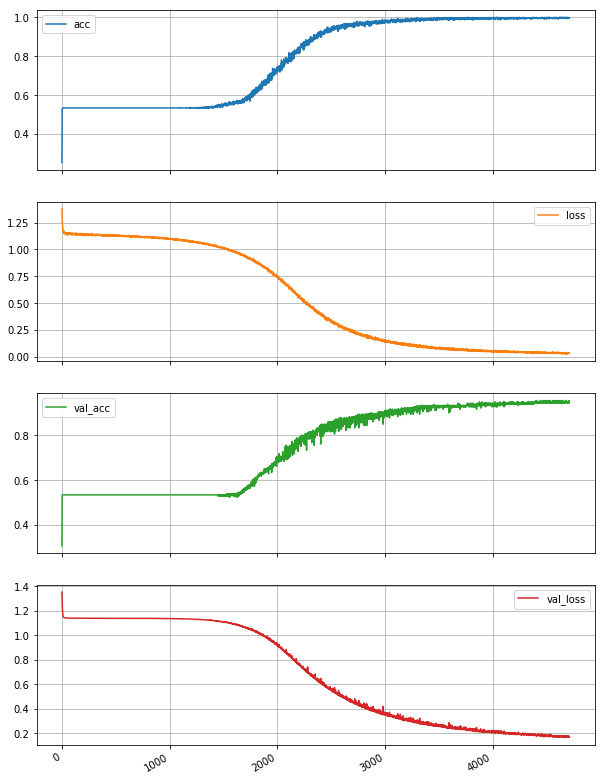

In [95]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15)) #plotting using matplotlib

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [96]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [106]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1
print("------------Accuracy of Software 2.0----------")
print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "rikhan")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50210680")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

------------Accuracy of Software 2.0----------
Errors: 0  Correct :100
Testing Accuracy: 100.0


In [105]:
wrongsol1   = 0
rightsol1   = 0

testData = pd.read_csv('testing.csv')

TestData  = testData['input'].values
TestLabel = testData['label'].values

for i in range (0,100):
    y = fizzbuzz(TestData[i])
    x = TestLabel[i]
    if y == x:
        rightsol1 = rightsol1 +1
    else:
        wrongsol1 = wrongsol1 + 1
print("----------Accuracy of Software 1.0-----------")    
print("Errors: " + str(wrongsol1), " Correct :" + str(rightsol1))

print("Testing Accuracy: " + str(rightsol1/(rightsol1+wrongsol1)*100))



----------Accuracy of Software 1.0-----------
Errors: 0  Correct :100
Testing Accuracy: 100.0
